In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Remove duplicates
df = df.drop_duplicates()

# Separate features & target variable
X = df.drop(columns=["label"])
y = df["label"]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get predictions
rf_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
rms = np.sqrt(mean_squared_error(y_test, rf_pred))

# Display results
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print(f"Random Forest RMS: {rms:.4f}")


Random Forest Accuracy: 0.9798
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     52311
           1       0.99      0.99      0.99       424
           2       1.00      1.00      1.00      9894
           3       0.89      0.89      0.89      6416

    accuracy                           0.98     69045
   macro avg       0.97      0.97      0.97     69045
weighted avg       0.98      0.98      0.98     69045

Random Forest RMS: 0.4253


In [13]:
# Training accuracy
rf_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, rf_train_pred)
test_accuracy = accuracy_score(y_test, rf_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 0.9798


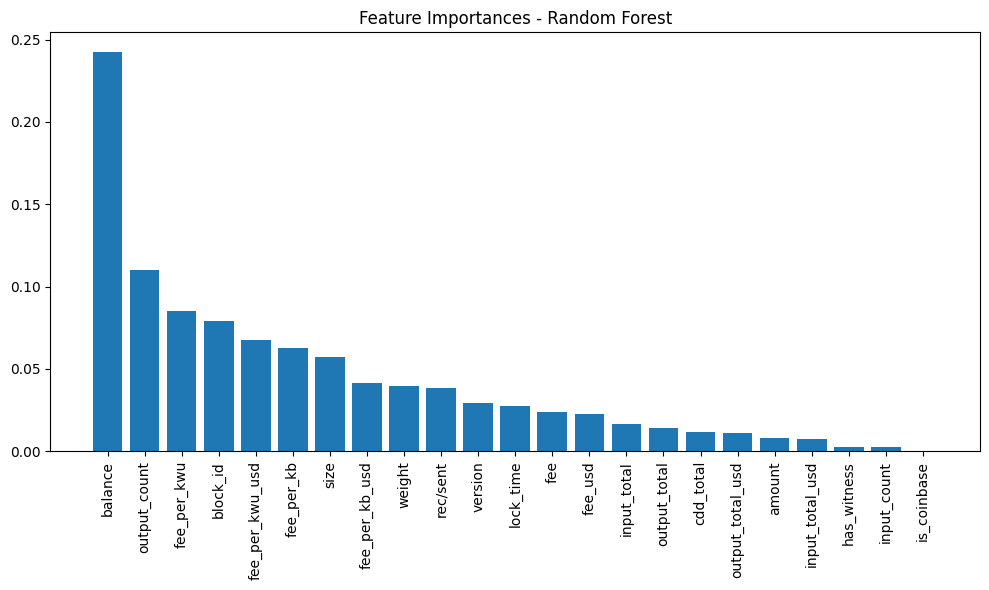

In [15]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = df.drop(columns=["label"]).columns  # Use the original feature names (before scaling)

# Sort features by importance
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)  # Use feature names here
plt.tight_layout()
plt.show()
